## ML | Data Preprocessing in Python
In order to derive knowledge and insights from data, the area of *data science* integrates statistical analysis, machine learning, and computer programming. It entails gathering, purifying, and converting unstructured data into a form that can be analysed and visualised. Data scientists process and analyse data using a number of methods and tools, such as statistical models, machine learning algorithms, and data visualisation software. Data science seeks to uncover patterns in data that can help with decision-making, process improvement, and the creation of new opportunities. Business, engineering, and the social sciences are all included in this interdisciplinary field.

# Data Preprocessing

Pre-processing refers to the transformations applied to our data before feeding it to the algorithm. Data preprocessing is a technique that is used to convert the raw data into a clean data set. In other words, whenever the data is gathered from different sources it is collected in raw format which is not feasible for the analysis.

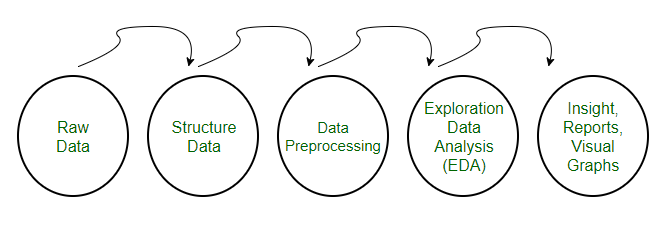

### Need of Data Preprocessing 
* For achieving better results from the applied model in Machine Learning projects the format of the data has to be in a proper manner. Some specified Machine Learning model needs information in a specified format, for example, Random Forest algorithm does not support null values, therefore to execute random forest algorithm null values have to be managed from the original raw data set.
* Another aspect is that the data set should be formatted in such a way that more than one Machine Learning and Deep Learning algorithm are executed in one data set, and best out of them is chosen.

## Steps in Data Preprocessing
#### Step 1: Import the necessary libraries



In [2]:
#import library
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import scipy 

#### Step 2: Load the dataset
Dataset link

In [3]:
#load the data
df = pd.read_csv("diabetes.csv")
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### Step 3: Statistical Analysis
In statistical analysis, first, we use the **df.describe()** which will give a descriptive overview of the dataset.


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


The above table shows the count, mean, standard deviation, min, 25%, 50%, 75%, and max values for each column. When we carefully observe the table we will find that. Insulin, Pregnancies, BMI, BloodPressure columns has outliers. 

Let’s plot the boxplot for each column for easy understanding.

#### Step 4: Check the outliers

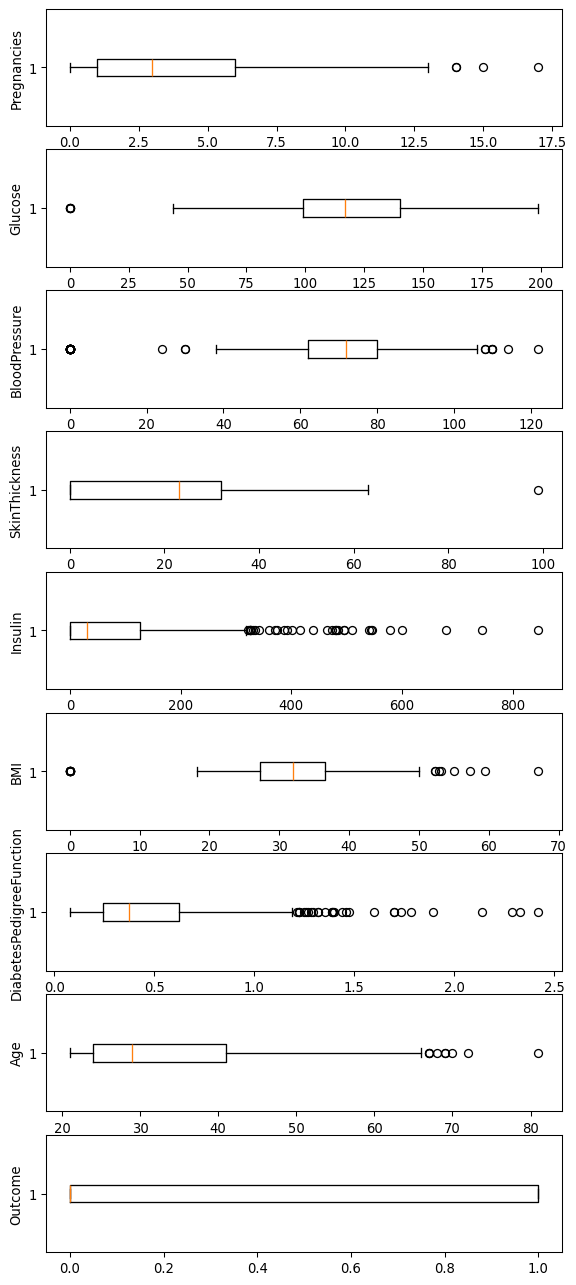

In [7]:
# Box plots 
fig, axs = plt.subplots(9, 1, dpi=95, figsize=(7, 17))
i = 0
for col in df.columns:
    axs[i].boxplot(df[col], vert=False)
    axs[i].set_ylabel(col)
    i+=1
plt.show()

In [8]:
# Identify the quartiles
q1, q3 = np.percentile(df['Insulin'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers
clean_data = df[(df['Insulin'] >= lower_bound) 
                & (df['Insulin'] <= upper_bound)]
 
 
# Identify the quartiles
q1, q3 = np.percentile(clean_data['Pregnancies'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers
clean_data = clean_data[(clean_data['Pregnancies'] >= lower_bound) 
                        & (clean_data['Pregnancies'] <= upper_bound)]
 
 
# Identify the quartiles
q1, q3 = np.percentile(clean_data['Age'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers
clean_data = clean_data[(clean_data['Age'] >= lower_bound) 
                        & (clean_data['Age'] <= upper_bound)]
 
 
# Identify the quartiles
q1, q3 = np.percentile(clean_data['Glucose'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers
clean_data = clean_data[(clean_data['Glucose'] >= lower_bound) 
                        & (clean_data['Glucose'] <= upper_bound)]
 
 
# Identify the quartiles
q1, q3 = np.percentile(clean_data['BloodPressure'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (0.75 * iqr)
upper_bound = q3 + (0.75 * iqr)
# Drop the outliers
clean_data = clean_data[(clean_data['BloodPressure'] >= lower_bound) 
                        & (clean_data['BloodPressure'] <= upper_bound)]
 
 
# Identify the quartiles
q1, q3 = np.percentile(clean_data['BMI'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
# Drop the outliers
clean_data = clean_data[(clean_data['BMI'] >= lower_bound) 
                        & (clean_data['BMI'] <= upper_bound)]
 
 
# Identify the quartiles
q1, q3 = np.percentile(clean_data['DiabetesPedigreeFunction'], [25, 75])
# Calculate the interquartile range
iqr = q3 - q1
# Calculate the lower and upper bounds
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
 
# Drop the outliers
clean_data = clean_data[(clean_data['DiabetesPedigreeFunction'] >= lower_bound) 
                        & (clean_data['DiabetesPedigreeFunction'] <= upper_bound)]

#### Steps 5: Correlation

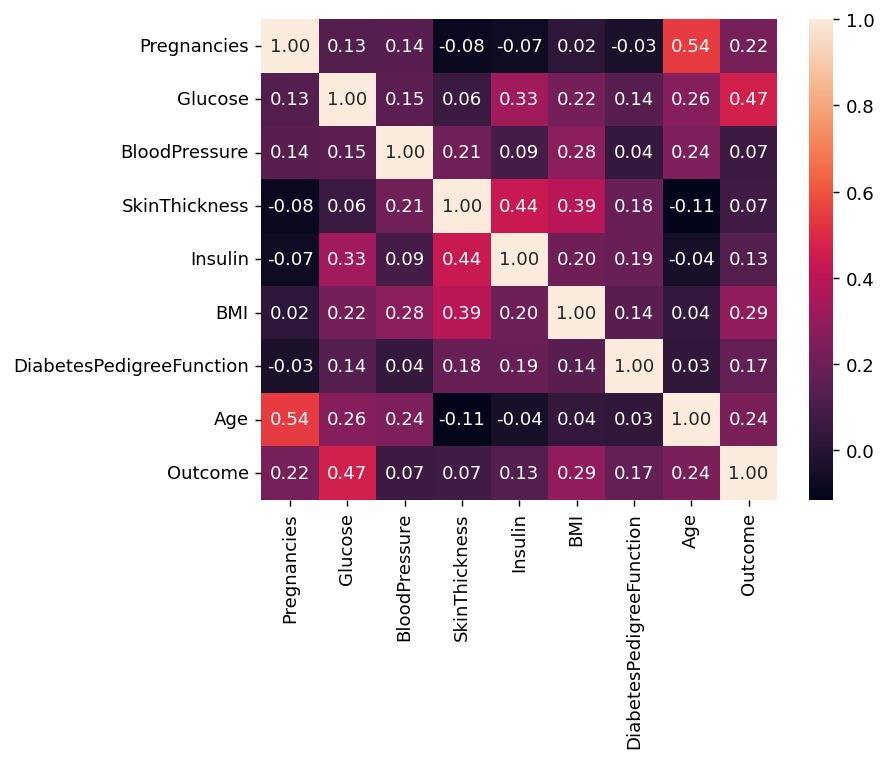

In [9]:
#correlation
corr = df.corr()

plt.figure(dpi=130)
sns.heatmap(df.corr(), annot=True, fmt= '.2f')
plt.show()

In [10]:
corr['Outcome'].sort_values(ascending=True)

BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
DiabetesPedigreeFunction    0.173844
Pregnancies                 0.221898
Age                         0.238356
BMI                         0.292695
Glucose                     0.466581
Outcome                     1.000000
Name: Outcome, dtype: float64

#### Check Outcomes Proportionality

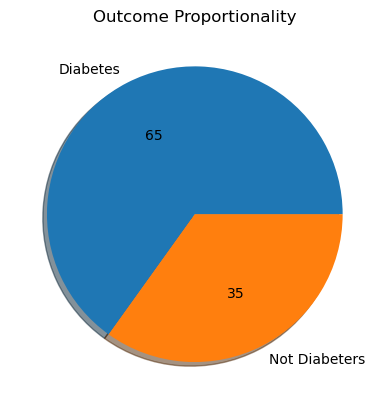

In [11]:
plt.pie(df.Outcome.value_counts(),
        labels=['Diabetes', 'Not Diabeters'],
        autopct='%.f', shadow=True)
plt.title('Outcome Proportionality')
plt.show()

#### Seperate independent features and target Variables

In [13]:
#seperate array into input and output components
X = df.drop(columns=['Outcome'])
Y = df.Outcome


#### Step 7: Normalization Or standardization
### **Normalization**
* MinMaxScaler scales the data so that each feature is in the range [0, 1]. 
* It works well when the features have different scales and the algorithm being used is sensitive to the scale of the features, such as k-nearest neighbors or neural networks.
* Rescale your data using scikit-learn using the MinMaxScaler.

# StandardScaler, MinMaxScaler and RobustScaler techniques – ML

**StandardScaler** follows ***Standard Normal Distribution (SND)*** . Therefore, it makes mean = 0 and scales the data to unit variance.
**MinMaxScaler** scales all the data features in the range [0, 1] or else in the range [-1, 1] if there are negative values in the dataset. This scaling compresses all the inliers in the narrow range [0, 0.005] .

In the presence of outliers, StandardScaler does not guarantee balanced feature scales, due to the influence of the outliers while computing the empirical mean and standard deviation. This leads to the shrinkage in the range of the feature values.
By using **RobustScaler()** , we can remove the outliers and then use either StandardScaler or MinMaxScaler for preprocessing the dataset.

##### How RobustScaler works:

<b>class<br>
sklearn.preprocessing.RobustScaler(<br> 
with_centering=True,<br>
with_scaling=True,<br>
quantile_range=(25.0, 75.0),<br>
copy=True,<br>
) </b>


It scales features using statistics that are robust to outliers. This method removes the median and scales the data in the range between 1st quartile and 3rd quartile . i.e., in between 25th quantile and 75th quantile range. This range is also called an Interquartile range .
The median and the interquartile range are then stored so that it could be used upon future data using the transform method. If outliers are present in the dataset, then the median and the interquartile range provide better results and outperform the sample mean and variance.
RobustScaler uses the interquartile range so that it is robust to outliers. 
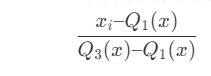


#### Code: comparison between StandardScaler, MinMaxScaler and RobustScaler.

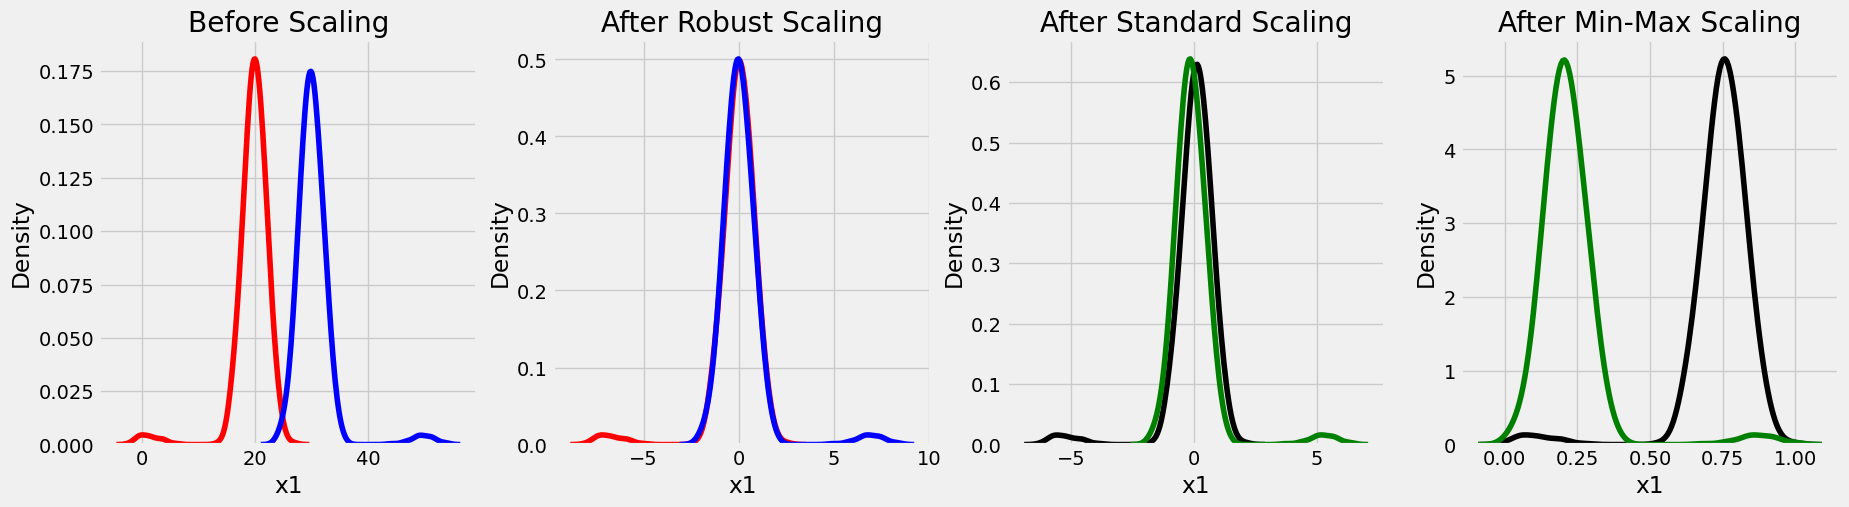

In [17]:
# Importing libraries
import numpy as np
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  
matplotlib.style.use('fivethirtyeight')

# data
x = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 2, 1000), np.random.normal(1, 2, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 2, 1000), np.random.normal(50, 2, 25)]),
})
np.random.normal

scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(x)
robust_df = pd.DataFrame(robust_df, columns =['x1', 'x2'])

scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(x)
standard_df = pd.DataFrame(standard_df, columns =['x1', 'x2'])

scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(x)
minmax_df = pd.DataFrame(minmax_df, columns =['x1', 'x2'])

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(20, 5))
ax1.set_title('Before Scaling')

sns.kdeplot(x['x1'], ax = ax1, color ='r')
sns.kdeplot(x['x2'], ax = ax1, color ='b')
ax2.set_title('After Robust Scaling')

sns.kdeplot(robust_df['x1'], ax = ax2, color ='red')
sns.kdeplot(robust_df['x2'], ax = ax2, color ='blue')
ax3.set_title('After Standard Scaling')

sns.kdeplot(standard_df['x1'], ax = ax3, color ='black')
sns.kdeplot(standard_df['x2'], ax = ax3, color ='g')
ax4.set_title('After Min-Max Scaling')

sns.kdeplot(minmax_df['x1'], ax = ax4, color ='black')
sns.kdeplot(minmax_df['x2'], ax = ax4, color ='g')
plt.show()


#### **Parameters of RobustScaler:**
* **with_centering**: **boolean**: It is True by default. If the value is True, the data is centered before scaling. When it is applied on sparse matrices, the transform will raise an exception because centering them requires building a dense matrix, which generally is too large to fit in the memory.
* **with_scaling**: **boolean**: It is also set to True by default. It scales the data to the interquartile range.
* **quantile_range**: **tuple**(q_min, q_max), 0.0 < q_min < q_max < 100.0 : Quantile range is used to calculate scale. By default, it is set as below. Default: (25.0, 75.0) = (1st quantile, 3rd quantile) = IQR.
* **copy**: **boolean**: It is an optional parameter. By default, it is True. If the input is already a NumPy array or a scipy.sparse CSC matrix and if axis = 1 , avoid a copy by setting this parameter to False and instead perform inplace row normalization.<br>
* Attributes:<br>
* **center_**: **array of floats**: The median value for each feature in the training set.
* **scale_**: **array of floats**: The scaled interquartile range for the feature in the training set.